# DATA SCIENCE INTENSIVE :: Intro to ML in Python
### An Intensive Python ML Course
## Week 01: Intro to Estimation Theory

[&larr; Back to course webpage](http://datakolektiv.com/app_direct/introdsnontech/)

![](../img/IntroMLPython_Head.png)

Feedback should be send to [goran.milovanovic@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com). 

These notebooks accompany the DATA SCIENCE INTENSIVE SERIES :: Introduction to ML in Python DataKolektiv course.

### Goran S. Milovanović, PhD
<b>DataKolektiv, Chief Scientist & Owner</b>

### Aleksandar Cvetković, PhD
<b>DataKolektiv, Consultant</b>

![](../img/DK_Logo_100.png)

## Intro to Estimation Theory

- Covariance and Correlation
- Simple Linear Regression
- The Method of Least Squares
- The Method of Maximum Likelihood

In [1]:
# - libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# - set RGN sed
np.random.seed(777) 

### Covariance and Correlation

In [2]:
# - libs
from sklearn import datasets

# - import iris data
iris = pd.read_csv("../_data/iris.csv")
print(iris.head(10))
print(iris.shape)

   sepal_length  sepal_width  petal_length  petal_width   class
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa
(150, 5)


It is not difficult to obtain the correlation coefficient from two vectors in `numpy`:

In [3]:
np.corrcoef(iris['sepal_length'], iris['petal_length'])

array([[1.        , 0.87175416],
       [0.87175416, 1.        ]])

`Numpy` will always return a full correlation matrix, so:

In [4]:
np.corrcoef(iris['sepal_length'], iris['petal_length'])[0,1]

0.8717541573048709

However, we now want to **understand** what the correlation coefficient really is. Intuitively, we say that it describes a relationship between two variables. The correlation coefficient - more precisely, the Pearson's correlation coefficient in our case - can very from `-1` to `+1`, describing a negative or positive, strong or week **linear relationship** between two variables.

You might have stumbled upon various formulas that compute this correlation coefficient. But it is easy to understand what it really us once we introduce a more elementary concept of **covariance** between two random variables.

**Covariance**. Given two random variables (RVs), $X$ and $Y$, their (sample) covariance is given by:

$$cov(X,Y) = E[(X-E[X])(Y-E[Y])] = \frac{(X-\bar{X})(Y-\bar{Y})}{N-1}$$

In [5]:
# - covariance
v1 = iris['sepal_length']
v2 = iris['petal_length']
# - the expected value of v1 (the mean of v1)
mean_v1 = v1.mean()
# - the expected value of v2 (the mean of v2)
mean_v2 = v2.mean()
diffs = (v1-mean_v1)*(v2-mean_v2)
cov = diffs.sum()/(v1.size-1)
print(cov)

1.273682326621924


Of course we have  `np.cov()` for covariance:

In [6]:
cov = np.cov(v1,v2,bias=False)
print(cov)

[[0.68569351 1.27368233]
 [1.27368233 3.11317942]]


The covariance of a variable with itself is its variance:

In [7]:
np.var(v1,ddof=1)

0.6856935123042505

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

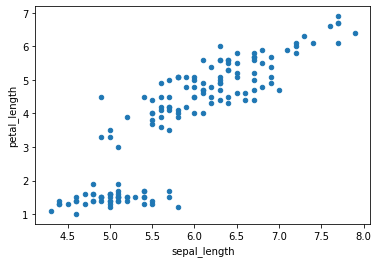

In [8]:
iris.plot.scatter(x="sepal_length",y="petal_length")

Enters `z-score`: the standardization of random variables.

Pearson's coefficient of correlation is nothing else than a covariance between $X$ and $Y$ upon their *standardization*. The standardization of a RV - widely known as a variable *z-score* - is obtained upon subtracting all of its values from the mean, and dividing by the standard deviation; for the **i**-th observation of $X$:

$$z(x_i) = \frac{x_i-\bar{X}}{\sigma}$$

In [9]:
# - standard deviation of v1
std_v1 = v1.std(ddof=1)
# - standard deviation of v2
std_v2 = v2.std(ddof=1)
# - v1 expressed as z-score
z_v1 = (v1-mean_v1)/std_v1
# - mean of z_v1 is now zero
print(np.round(z_v1.mean(),2))
# - v2 expressed as z-score
z_v2 = (v2-mean_v2)/std_v2
# - mean of z_v2 is now zero
print(np.round(z_v2.mean(),2))
# - covariance between z_v1 and z_v2
cov = np.cov(z_v1, z_v2,bias=True)
print(cov)

-0.0
-0.0
[[0.99333333 0.86594246]
 [0.86594246 0.99333333]]


Now Pearsons's correlation between `v1` and `v2`:

In [10]:
np.corrcoef(v1, v2)[0,1]

0.8717541573048709

So: Pearson's correlation coefficient is just the covariance between standardized variables.

Finally, to determine how much variance is shared between two variables, we square the correlation coefficient to obtain the **coefficient of determination**, $R^2$

In [11]:
r2 = np.corrcoef(v1, v2)[0,1]**2
print(r2)

0.7599553107783257


We have already introduced some of the building blocks for the first model of statistical learning that we will discuss in the step: *Simple Linear Regression*. 

In Simple Linear Regression, we discuss the model of the following functional form:

$$Y = \beta_0 + \beta_1X_1 + \epsilon $$

- $Y$ is the variable whose values we would like to be able to predict - and it is called a *criterion* or a *dependent variable* - from
- $X$, which is called a *predictor*, or an *independent variable* in the Simple Linear Regression setting;
- $\beta_0$ and $\beta_1$ are *model parameters*, of which the former represents the *intercept* while the later is the *slope* of the regression line (**note:** besides $\epsilon$, what the equation represents is nothing else but the equation of a straight line in a plane that you have seen a dozen times in high school); finally,
- $\epsilon$ represents the model error term, which we will discuss in length in our next session.

If we assume that the relationship between $X$ and $Y$ is indeed linear - and introduce some additional assumptions that we will discuss in our next session - the following question remains:

> What values of $\beta_0$ and $\beta_1$ would pick a line in a plane spawned by $X$ and $Y$ values so that it describes the assumed linear relationship between them the best?

### Linear Regression

In [12]:
# - fitting the linear model to the data
import statsmodels.api as sm
import statsmodels.formula.api as smf
linear_model = smf.ols(formula='petal_length ~ sepal_length', data=iris).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           petal_length   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     468.6
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           1.04e-47
Time:                        14:36:13   Log-Likelihood:                -190.49
No. Observations:                 150   AIC:                             385.0
Df Residuals:                     148   BIC:                             391.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -7.0954      0.506    -14.011      0.000      -8.096      -6.095
sepal_length     1.8575      0.086     21.646      0.000       1.688       2.027
==============================================================================
Omnibus:                        0.255   Durbin-Watson:                   1.204
Prob(Omnibus):                  0.880   Jarque-Bera (JB):                0.384
Skew:                          -0.084   Prob(JB):                        0.825
Kurtosis:                       2.817   Cond. No.                         43.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The parameters, $\beta_0$ (intercept) and $\beta_1$ (slope)

In [13]:
linear_model.params

Intercept      -7.095381
sepal_length    1.857510
dtype: float64

The residuals are what is represented by the model error term $\epsilon$: they represent the difference between the observed and the predicted value:

In [14]:
iris['Prediction'] = linear_model.predict()
iris['Residuals'] = linear_model.resid
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class,Prediction,Residuals
0,5.1,3.5,1.4,0.2,setosa,2.377918,-0.977918
1,4.9,3.0,1.4,0.2,setosa,2.006416,-0.606416
2,4.7,3.2,1.3,0.2,setosa,1.634914,-0.334914
3,4.6,3.1,1.5,0.2,setosa,1.449163,0.050837
4,5.0,3.6,1.4,0.2,setosa,2.192167,-0.792167
5,5.4,3.9,1.7,0.4,setosa,2.935171,-1.235171
6,4.6,3.4,1.4,0.3,setosa,1.449163,-0.049163
7,5.0,3.4,1.5,0.2,setosa,2.192167,-0.692167
8,4.4,2.9,1.4,0.2,setosa,1.077661,0.322339
9,4.9,3.1,1.5,0.1,setosa,2.006416,-0.506416


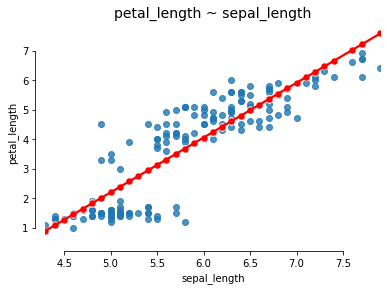

In [15]:
# - plotting the true data, predicted values and the prediction line
sns.regplot(data=iris, x='sepal_length', y='petal_length', ci=0, line_kws={'color':'red'})
sns.scatterplot(data=iris, x='sepal_length', y='Prediction', color='red', s=50)
sns.despine(offset=10, trim=True)
plt.title('petal_length ~ sepal_length', fontsize=14);

Pearson's $R$ and $R^2$

In [16]:
print("Pearson's correlation (R-value): " + str(round(np.sqrt(linear_model.rsquared), 2)))
print("Coefficient of determination (R^2): " + str(round(linear_model.rsquared, 2)))

Pearson's correlation (R-value): 0.87
Coefficient of determination (R^2): 0.76


Ok, `statsmodels` can do it; how do we find out about the optimal values of $\beta_0$ and $\beta_1$?
Let's build ourselves a function that (a) tests for some particular values of $\beta_0$ and $\beta_1$ for a particular regression problem (i.e. for a particular dataset) and returns the model error.

The model error? Oh. Remember the residuals:

$$\epsilon_i = y_i - \hat{y_i}$$

where $y_i$ is the observation to be predicted, and $\hat{y_i}$ the actual prediction?

Next we do something similar to what happens in the computation of variance, square the differences:

$$\epsilon_i^2 = (y_i - \hat{y_i})^2$$

and define the model error for all observations to be **the sum of squares**:

$$SSE = \sum_{i=1}^{N}(y_i - \hat{y_i})^2$$

Obviously, the lower the $SSE$ - the Sum of Squared Error - the better the model! Here's a function that returns the SSE for a given data set (with two columns: the predictor and the criterion) and a choice of parameters $\beta_0$ and $\beta_1$:

In [17]:
# - sse function
def lg_sse(pars):
    # - pick up the parameters
    beta_0 = pars[0]
    beta_1 = pars[1]
    # - predict from parameters
    preds = beta_0+beta_1*iris['sepal_length']
    # - compute residuals
    residuals = iris['petal_length']-preds
    # - square the residuals
    residuals = residuals**2
    # - sum of squares
    residuals = residuals.sum()
    # - out:
    return residuals

Test `lg_sse()` now:

In [18]:
pars = [-7.095381, 1.857510]
print(lg_sse(pars))

111.34802571010499


Check via `statsmodels`:

In [19]:
(linear_model.resid**2).sum()

111.34802570920539

Method A. Random parameter space search

In [20]:
beta_0 = np.random.uniform(low=-15, high=15, size=10000)
beta_1 = np.random.uniform(low=-15, high=15, size=10000)
random_pars = pd.DataFrame({'beta_0':beta_0, 'beta_1':beta_1})
random_pars.head()

,beta_0,beta_1
0,-10.420088,-11.461761
1,-5.929302,8.116856
2,-13.138908,-1.607650
3,-1.204190,14.371262
4,10.057602,-6.014701


In [21]:
sse = []
for i in range(random_pars.shape[0]):
    pars = [random_pars['beta_0'][i],random_pars['beta_1'][i]]
    sse.append(lg_sse(pars))
random_pars['sse'] = sse
random_pars.sort_values('sse', ascending=True, inplace=True)
random_pars.head()

,beta_0,beta_1,sse
584,-6.673735,1.762458,114.955420
1737,-8.135614,2.013342,116.350521
4672,-7.862939,2.015235,117.450969
1190,-8.103656,1.998799,118.392934
2269,-6.896713,1.860619,118.401879


Check with `statsmodels`:

In [22]:
linear_model.params

Intercept      -7.095381
sepal_length    1.857510
dtype: float64

Not bad, how about 100,000 random pairs?

In [23]:
beta_0 = np.random.uniform(low=-15, high=15, size=100000)
beta_1 = np.random.uniform(low=-15, high=15, size=100000)
random_pars = pd.DataFrame({'beta_0':beta_0, 'beta_1':beta_1})
sse = []
for i in range(random_pars.shape[0]):
    pars = [random_pars['beta_0'][i],random_pars['beta_1'][i]]
    sse.append(lg_sse(pars))
random_pars['sse'] = sse
random_pars.sort_values('sse', ascending=True, inplace=True)
random_pars.head()

,beta_0,beta_1,sse
51770,-7.081345,1.856986,111.366135
48344,-7.476603,1.915794,111.942890
1599,-7.304722,1.903305,112.071409
2471,-7.246934,1.894646,112.131383
22482,-6.498430,1.746393,113.020430


Method B. Grid search

In [24]:
beta_0_vals = np.linspace(-15,15,100)
beta_1_vals = np.linspace(-15,15,100)
grid = np.array([(beta_0, beta_1) for beta_0 in beta_0_vals for beta_1 in beta_1_vals])
grid = pd.DataFrame(grid)
grid = grid.rename(columns={0: "beta_0", 1: "beta_1"})
grid.head()

,beta_0,beta_1
0,-15.0,-15.000000
1,-15.0,-14.696970
2,-15.0,-14.393939
3,-15.0,-14.090909
4,-15.0,-13.787879


In [25]:
sse = []
for i in range(grid.shape[0]):
    pars = [grid['beta_0'][i],grid['beta_1'][i]]
    sse.append(lg_sse(pars))
grid['sse'] = sse
grid.sort_values('sse', ascending=True, inplace=True)
grid.head()

,beta_0,beta_1,sse
2456,-7.727273,1.969697,112.717860
3055,-5.909091,1.666667,115.828053
2955,-6.212121,1.666667,123.135675
2356,-8.030303,1.969697,124.341368
2556,-7.424242,1.969697,128.642562


Check with `statsmodels`:

In [26]:
linear_model.params

Intercept      -7.095381
sepal_length    1.857510
dtype: float64

Method C. Optimization (the real thing)

The Method of Least Squares

In [27]:
import scipy as sp

# - sse function
def lg_sse(pars, data):
    # - pick up the parameters
    beta_0 = pars[0]
    beta_1 = pars[1]
    # - predict from parameters
    preds = beta_0+beta_1*data['sepal_length']
    # - compute residuals
    residuals = data['petal_length']-preds
    # - square the residuals
    residuals = residuals**2
    # - sum of squares
    residuals = residuals.sum()
    # - out:
    return residuals

# - initial (random) parameter values
init_beta_0 = np.random.uniform(low=-15, high=15, size=1)
init_beta_1 = np.random.uniform(low=-15, high=15, size=1)
init_pars = [init_beta_0, init_beta_1]

# - optimize w. Nelder-Mead
optimal_model = sp.optimize.minimize(
    # - fun(parameters, args)
    fun=lg_sse,
    args = (iris), 
    x0 = init_pars, 
    method='Nelder-Mead')

# - optimal parameters
optimal_model.x

array([-7.09536384,  1.85750582])

Check against `statsmodels`

In [28]:
linear_model.params

Intercept      -7.095381
sepal_length    1.857510
dtype: float64

Final value of the objective function (the model SSE, indeed):

In [29]:
lg_sse(pars=optimal_model.x, data=iris)

111.34802571419112

Check against `statsmodels`

In [30]:
linear_model.ssr

111.34802570920539

Maximum Likelihood Estimation

In [31]:
# - normal distribution
from scipy.stats import norm

# - nll function
def lg_nll(pars, data):
    # - pick up the parameters
    beta_0 = pars[0]
    beta_1 = pars[1]
    # - predict from parameters
    preds = beta_0+beta_1*data['sepal_length']
    # - compute residuals
    residuals = data['petal_length']-preds
    # - residual variance
    res_var = np.var(residuals)
    # - negative log-likelihood
    nll = -np.sum(norm.logpdf(residuals, loc=0, scale=np.sqrt(res_var)))
    # - out:
    return nll

# - initial (random) parameter values
init_beta_0 = np.random.uniform(low=-15, high=15, size=1)
init_beta_1 = np.random.uniform(low=-15, high=15, size=1)
init_pars = [init_beta_0, init_beta_1]

# - optimize w. Nelder-Mead
optimal_model = sp.optimize.minimize(
    # - fun(parameters, args)
    fun=lg_nll,
    args = (iris), 
    x0 = init_pars, 
    method='Nelder-Mead',
    options={'maxiter':10e6, 
            'maxfev':10e6,
            'fatol':10e-12})

# - optimal parameters
optimal_model.x

array([-7.09538075,  1.85750952])

Check against `statsmodels`

In [32]:
linear_model.params

Intercept      -7.095381
sepal_length    1.857510
dtype: float64

Log Likelihood

In [33]:
loglike = -lg_nll(optimal_model.x, data=iris)
print(loglike)

-190.49268265220485


Check against `statsmodels`

In [34]:
linear_model.llf

-190.49268265220212

### Intro Readings and Videos

- 

### Highly Recommended To Do

- Watch [Python NumPy Tutorial for Beginners](https://www.youtube.com/watch?v=QUT1VHiLmmI)
- Read chapter [Introduction to NumPy](https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html) from [Python Data Science Handbook, Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/)

<hr>

Goran S. Milovanović & Aleksandar Cvetković

DataKolektiv, 2022/23.

[hello@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com)

![](../img/DK_Logo_100.png)

<font size=1>License: <a href="https://www.gnu.org/licenses/gpl-3.0.txt">GPLv3</a> This Notebook is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version. This Notebook is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details. You should have received a copy of the GNU General Public License along with this Notebook. If not, see <a href="http://www.gnu.org/licenses/">http://www.gnu.org/licenses/</a>.</font>